<a href="https://colab.research.google.com/github/DivyanshByte/FaceToPixelArt/blob/main/Face_Mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

In [2]:
IMAGE_FILE= "bezosmusk.jpg"

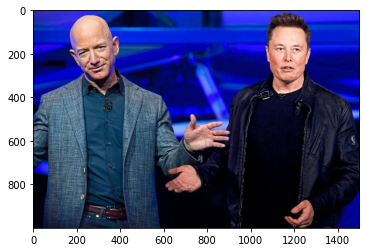

In [3]:
import cv2
import face_recognition
img=cv2.imread(IMAGE_FILE)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
plt.imshow(img)

In [4]:
face_location=face_recognition.face_locations(img)

In [5]:
face_location

[(118, 1281, 341, 1058), (139, 386, 325, 201)]

In [6]:
face_landmarks=face_recognition.face_landmarks(img)
face_landmarks

[{'bottom_lip': [(1197, 271),
   (1189, 278),
   (1178, 281),
   (1168, 282),
   (1160, 281),
   (1148, 278),
   (1139, 269),
   (1144, 268),
   (1161, 270),
   (1169, 270),
   (1178, 270),
   (1192, 270)],
  'chin': [(1082, 180),
   (1084, 204),
   (1086, 228),
   (1087, 252),
   (1092, 276),
   (1105, 295),
   (1122, 311),
   (1144, 322),
   (1168, 326),
   (1192, 323),
   (1213, 311),
   (1230, 297),
   (1242, 279),
   (1248, 257),
   (1250, 234),
   (1253, 211),
   (1256, 188)],
  'left_eye': [(1122, 180),
   (1131, 175),
   (1142, 176),
   (1148, 184),
   (1139, 185),
   (1130, 184)],
  'left_eyebrow': [(1103, 167),
   (1114, 157),
   (1128, 154),
   (1142, 157),
   (1155, 164)],
  'nose_bridge': [(1171, 182), (1171, 195), (1172, 210), (1172, 224)],
  'nose_tip': [(1156, 234),
   (1163, 237),
   (1171, 239),
   (1178, 238),
   (1185, 236)],
  'right_eye': [(1192, 185),
   (1201, 179),
   (1211, 178),
   (1217, 184),
   (1211, 188),
   (1201, 187)],
  'right_eyebrow': [(1187, 166),

In [7]:
from PIL import Image, ImageDraw
img1=face_recognition.load_image_file(IMAGE_FILE)

In [8]:
type(img1)

numpy.ndarray

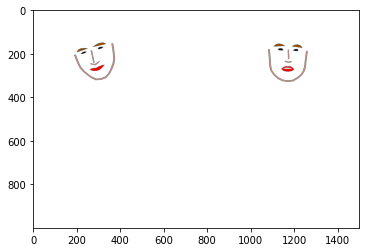

In [9]:
newImage = Image.new("RGBA",Image.fromarray(img1).size,"white")
d=ImageDraw.Draw(newImage, "RGBA")
d.rectangle([0,0,Image.fromarray(img1).width,Image.fromarray(img1).height],fill=(0,0,0,0))
for face_landmark in face_landmarks:
  #draw red color on the lips
  d.polygon(face_landmark['bottom_lip'],fill=(245,0,0,255))
  d.polygon(face_landmark['top_lip'],fill=(245,0,0,255))
  #draw red color on the eyebrows
  d.line(face_landmark['left_eyebrow'],fill=(0,100,0,255))
  d.line(face_landmark['right_eyebrow'],fill=(0,100,0,255))
  d.polygon(face_landmark['left_eyebrow'],fill=(150, 75, 0,255))
  d.polygon(face_landmark['right_eyebrow'],fill=(150, 75, 0,255))
  d.polygon(face_landmark['left_eye'],fill=(7, 11, 24,255))
  d.polygon(face_landmark['right_eye'],fill=(7, 11, 24,255))
  d.line(face_landmark['nose_tip'],fill=(197, 140, 133,255),width=5)
  d.line(face_landmark['nose_bridge'],fill=(197, 140, 133,255),width=5)
  d.line(face_landmark['chin'],fill=(197, 140, 133,255),width=7)
plt.imshow(newImage)
newImage.save("detected.png")

In [10]:
PIXEL_SIZE=5

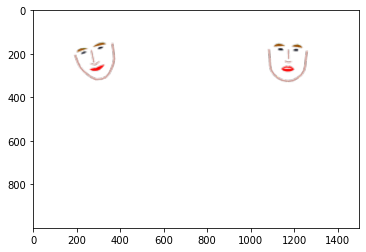

In [11]:
smallImage = newImage.resize((newImage.width//PIXEL_SIZE,newImage.height//PIXEL_SIZE))
pixelImage =smallImage.resize(newImage.size,Image.NEAREST)
pixelImage.save('output.png')
plt.imshow(pixelImage)

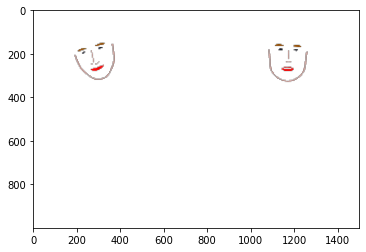

In [12]:
def checkOutline(avalue):
  if (avalue[0] in range(150,256)):
    return True
  else:
    return False
resultImage = Image.new("RGBA",newImage.size,"white")
pixelImagePixels = pixelImage.load()
resultImagePixels = resultImage.load()
for i in range(pixelImage.width):
  for j in range(pixelImage.height):
    #if (pixelImagePixels[i,j])[3:] == (255,):
    if (checkOutline((pixelImagePixels[i,j])[3:])):
      resultImagePixels[i,j] = pixelImagePixels[i,j]
    else:
      resultImagePixels[i,j] = (0,0,0,0)
plt.imshow(resultImage)
resultImage.save("result.png")

In [ ]:
def getIntfromRGB(rgb):
    RGBint = -rgb[0]
    RGBint = (RGBint<<8) - rgb[1]
    RGBint = (RGBint<<8) - rgb[2]
    #RGBint = (red<<16) + (green<<8) + blue
    return RGBint
ppaString = f"{resultImage.width//PIXEL_SIZE};{resultImage.height//PIXEL_SIZE};{PIXEL_SIZE};\n"
tempImage =  resultImage.resize((resultImage.width//PIXEL_SIZE,resultImage.height//PIXEL_SIZE))
tempImagePixels = tempImage.load()
for i in range(tempImage.height):
  for j in range(tempImage.width):
    if (str(getIntfromRGB(tempImagePixels[j,i])) == "0"):
      ppaString += "-1"
    else:
      ppaString += str(getIntfromRGB(tempImagePixels[j,i]))
    if (j < tempImage.width-1):
      ppaString += ","
  ppaString += "\n"
with open("Art.ppa","w") as file:
  file.write(ppaString)